  <tr>
        <td>
            <div align="left">
                <font size=25px>
                    <b> Predicting whether client will agree to place deposit
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'


## Data Definition:

Input variables:

### Bank client data:

1) **age** (numeric)


2) **job:** type of job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")


3) **marital:** marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)


4) **education:** education of individual (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")


5) **default:** has credit in default? (categorical: "no","yes","unknown")


6) **housing:** has housing loan? (categorical: "no","yes","unknown")


7) **loan:** has personal loan? (categorical: "no","yes","unknown")


### Related with the last contact of the current campaign:


8) **contact:** contact communication type (categorical: "cellular","telephone")


9) **month:** last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")


10) **dayofweek:** last contact day of the week (categorical: "mon","tue","wed","thu","fri")


11) **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


### Other attributes:


12) **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)


13) **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


14) **previous:** number of contacts performed before this campaign and for this client (numeric)


15) **poutcome:** outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Social and economic context attributes


16) **emp.var.rate:** employment variation rate - quarterly indicator (numeric)


17) **cons.price.idx:** consumer price index - monthly indicator (numeric)


18) **cons.conf.idx:** consumer confidence index - monthly indicator (numeric)


19) **concave points_se:** standard error for number of concave portions of the contour


20) **euribor3m:** euribor 3 month rate - daily indicator (numeric)


21) **nr.employed:** number of employees - quarterly indicator (numeric)

Output variable (desired target):

22) **y:**  has the client subscribed a term deposit? (binary: "yes","no")


1. **[Import Packages](#import_packages)**
2. **[Read Data](#Read_Data)**
3. **[Understand and Prepare the Data](#data_preparation)**
    - 3.1 - [Data Types and Dimensions](#Data_Types)
    - 3.2 - [Statistical Summary](#Statistical_Summary)
    - 3.3 - [Visualization](#Visualization)
    - 3.4 - [Label Encoding for Target Variable](#Label_Encoding_for_Target_Variable)
    - 3.5 - [Missing Data Treatment](#Missing_Data_Treatment)
    - 3.6 - [Correlation](#Correlation)
    - 3.7 - [Data Cleaning](#Data_Cleaning) 
    - 3.8 - [Feature Selection](#Feature_Selection)
    - 3.9 - [Handling Unbalanced Labels](#SMOTE) 
    - 3.10 - [Standardization](#Standardizing_Data) 
4. **[Supervised Learning](#Supervised_Learning)**
    - 4.1 - [Logistic Regression](#Logistic_Regression)
    - 4.2 - [AdaBoost](#AdaBoost)
    - 4.3 - [Naive Bayes](#Naive_Bayes)
    - 4.4 - [KNN](#KNN)
    - 4.5 - [Support Vector Machine](#SVM)
5. **[Model Comparision](#model_cmp)**  
    
 

<a id='import_packages'></a>
## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set default setting of seaborn
sns.set()

<a id='Read_Data'></a>
## 2. Read the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>Read the data using read_csv() function from pandas<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
# read the data
raw_data = pd.read_csv('bank.csv',delimiter=";")

# print the first five rows of the data
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<a id='data_preparation'></a>
## 3. Understand and Prepare the Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The process of data preparation entails cleansing, structuring and integrating data to make it ready for analysis. <br><br>
                        Here we will analyze and prepare data :<br>
                        1. Check dimensions and data types of the dataframe <br>
                        2. Study summary statistics<br> 
                        3. Check for missing values<br>
                        4. Study correlation<br>
                                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
data = raw_data.copy()

<a id='Data_Types'></a>
## 3.1 Data Types and Dimensions

In [4]:
# check the data types for variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# get the shape
print(data.shape)

(41188, 21)


**We see the dataframe has 21 columns and 41188 observations**

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='note.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                    <b>We check the class distribution of the target variable<br>
                    </br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

Number of Client subscribed :  36548
Number of Clients not subscribed  :  4640


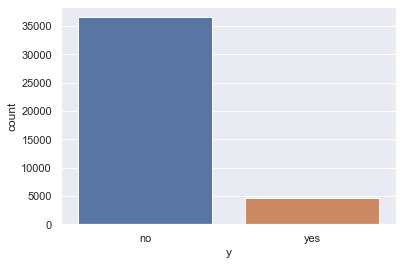

In [6]:
ax = sns.countplot(data['y'],label="Count")     
S, N = data['y'].value_counts()
print('Number of Client subscribed : ',S)
print('Number of Clients not subscribed  : ',N)

#### We see that the data is imbalanced

<a id='Statistical_Summary'></a>
## 3.2 Statistical Summary
Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> In our dataset we have numerical variables. Now we check for summary statistics of all the variables<br>
                        For numerical variables, we use .describe(). For categorical variables we use describe(include='object').
          <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# data frame with numerical features
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.</b>     </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# data frame with categorical features
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>The above output illustrates the summary statistics of the categorical variables i.e diagnosis(no.of levels in the variable), top(majority level) and the count of the majority level.</b>     </font>
            </div>
        </td>
    </tr>
</table>

<a id='Visualization'></a>
## 3.3. Visualization



In [9]:
# Building a function to show categorical values disribution
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = data[data['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = data[data['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()

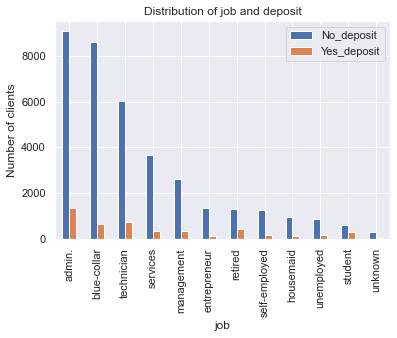

In [10]:
plot_bar('job')


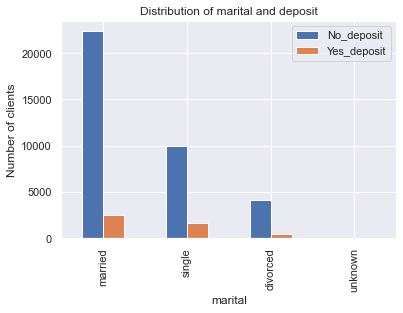

In [11]:
plot_bar('marital')

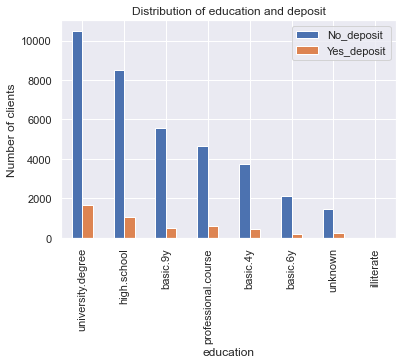

In [12]:
 plot_bar('education')

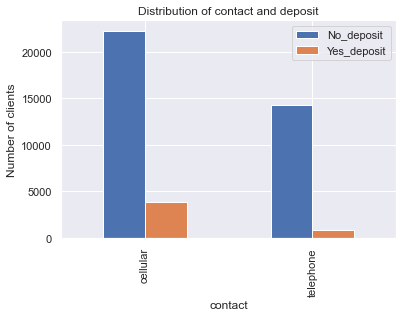

In [13]:
plot_bar('contact')

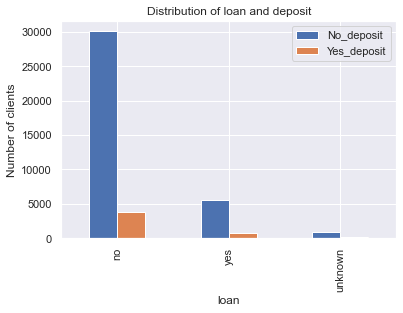

In [14]:
 plot_bar('loan')

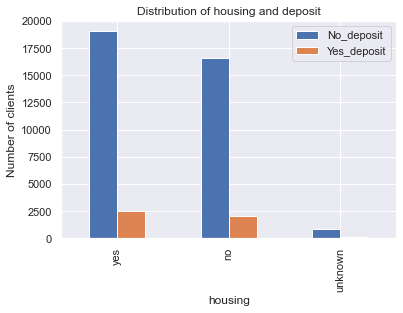

In [15]:
 plot_bar('housing')

**Primary analysis of several categorical features reveals:**

1. Administrative staff and technical specialists opened the deposit most of all. In relative terms, a high proportion of pensioners and students might be mentioned as well.
2. Although in absolute terms married consumers more often agreed to the service, in relative terms the single was responded better.
3. Best communication channel is secullar.
4. The difference is evident between consumers who already use the services of banks and received a loan.
5. Home ownership does not greatly affect marketing company performance.



**PDF's of features**

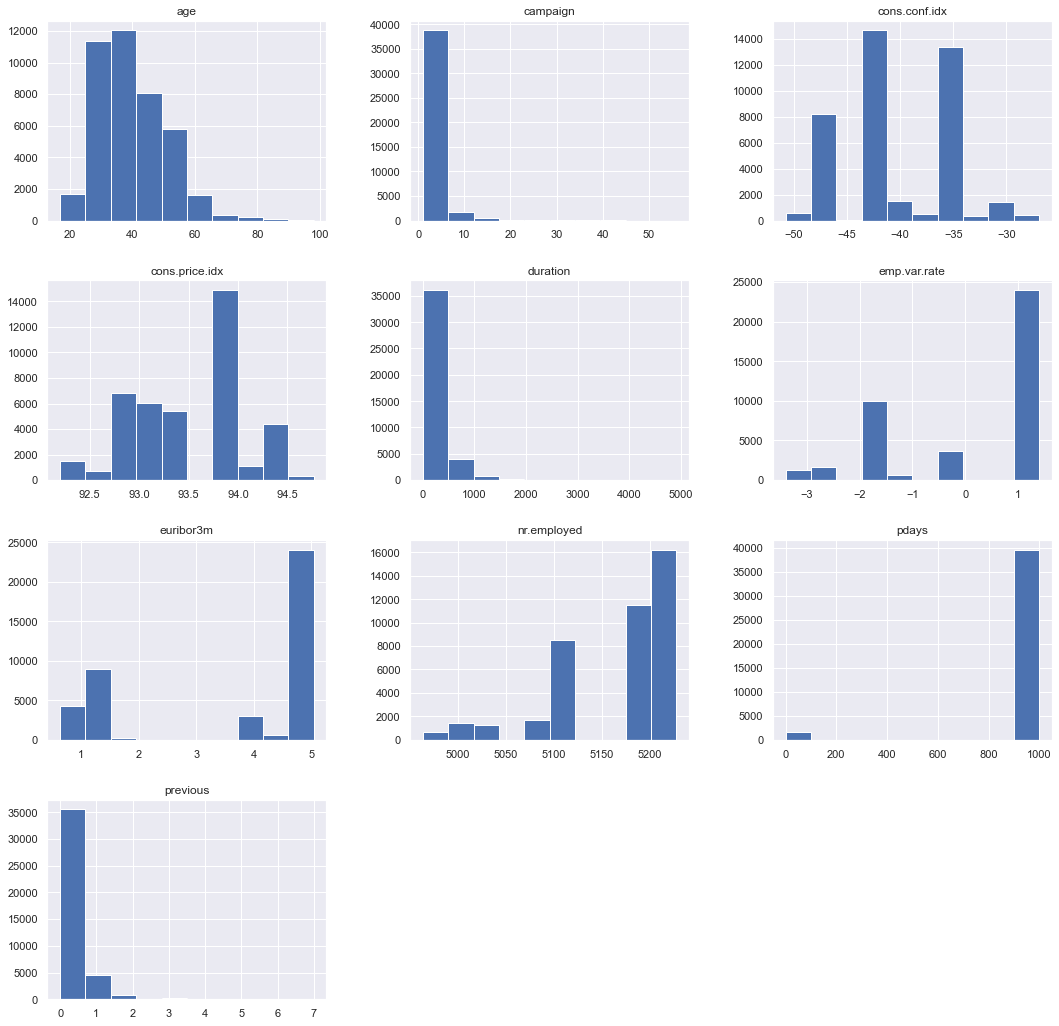

In [16]:
fig = data.hist(figsize = (18,18))


<a id='Label_Encoding_for_Target_Variable'></a>
## 3.4. Label Encoding for Target Variable
Converting target categorical variable into numeric


In [17]:
# Convert target variable into numeric
data.y = data.y.map({'no':0, 'yes':1})

<a id='Missing_Data_Treatment'></a>
## 3.5. Missing Data Treatment

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# get the count of missing values
missing_values = data.isnull().sum()

# print the count of missing values
print(missing_values)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


There are no missing values present in the data.

<a id='Correlation'></a>
## 3.6 Correlation


<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Call the corr() function which will return the correlation matrix of numeric variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# check correlation
data_num = data.copy()
corr = data_num.corr()
corr




,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


<AxesSubplot:>

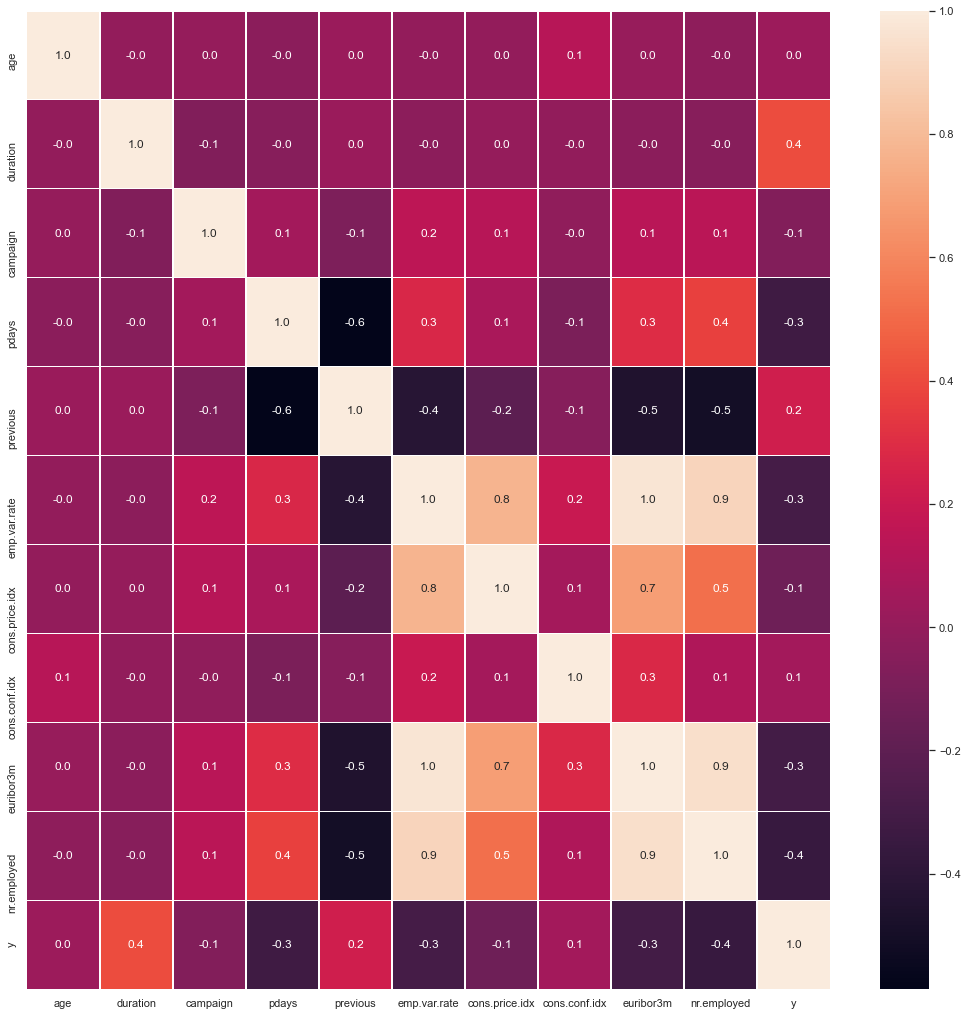

In [20]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
<b>From correlation matrix we observe next:

1. most correlated with target feature is call duration. So we need to transform it to reduce the influence
2. Higly correlated features (employment rate, consumer confidence index, consumer price index) may describe clients state from different social-economic angles. Their variance might support model capacity for generalization.
</b></font></div></td>
    </tr>
</table>

<a id="Data_Cleaning"> </a>
## 3.7 Data Cleaning


**For categories of more than 3 types of possible option (marital and education) it is proposed to use the encode targeting - it will allow correctly relate the values to the target variable and use indicated categories in numerical form**

In [21]:
# Replacing values with binary ()
data.contact = data.contact.map({'cellular': 1, 'telephone': 0}).astype('uint8') 
data.loan = data.loan.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
data.housing = data.housing.map({'yes': 1, 'unknown': 0, 'no' : 0}).astype('uint8')
data.default = data.default.map({'no': 1, 'unknown': 0, 'yes': 0}).astype('uint8')
data.pdays = data.pdays.replace(999, 0) # replace with 0 if not contact 
data.previous = data.previous.apply(lambda x: 1 if x > 0 else 0).astype('uint8') # binary has contact or not

In [22]:
# binary if were was an outcome of marketing campane
data.poutcome = data.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

In [23]:
# change the range of Var Rate
data['emp.var.rate'] = data['emp.var.rate'].apply(lambda x: x*-0.0001 if x > 0 else x*1)
data['emp.var.rate'] = data['emp.var.rate'] * -1
data['emp.var.rate'] = data['emp.var.rate'].apply(lambda x: -np.log(x) if x < 1 else np.log(x)).astype('uint8')

In [24]:
# Multiply consumer index 
data['cons.price.idx'] = (data['cons.price.idx'] * 10).astype('uint8')

In [25]:
# change the sign (we want all be positive values)
data['cons.conf.idx'] = data['cons.conf.idx'] * -1

In [26]:
# re-scale variables
data['nr.employed'] = np.log2(data['nr.employed']).astype('uint8')
data['cons.price.idx'] = np.log2(data['cons.price.idx']).astype('uint8')
data['cons.conf.idx'] = np.log2(data['cons.conf.idx']).astype('uint8')
data.age = np.log(data.age)

In [27]:
# less space
data.euribor3m = data.euribor3m.astype('uint8')
data.campaign = data.campaign.astype('uint8')
data.pdays = data.pdays.astype('uint8')

In [28]:
# fucntion to One Hot Encoding
def encode(data, col):
    return pd.concat([data, pd.get_dummies(col, prefix=col.name)], axis=1)

In [29]:
# One Hot encoding of 3 variable 
data = encode(data, data.job)
data = encode(data, data.month)
data = encode(data, data.day_of_week)

In [30]:
# Drop tranfromed features
data.drop(['job', 'month', 'day_of_week'], axis=1, inplace=True)

**Droping duplicates**

In [31]:
data.drop_duplicates(inplace=True) 

In [32]:
data.loc[data['duration'] <= 102, 'duration'] = 1
data.loc[(data['duration'] > 102) & (data['duration'] <= 180)  , 'duration'] = 2
data.loc[(data['duration'] > 180) & (data['duration'] <= 319)  , 'duration'] = 3
data.loc[(data['duration'] > 319) & (data['duration'] <= 645), 'duration'] = 4
data.loc[data['duration']  > 645, 'duration'] = 5

**Target encoding for two categorical feature**

In [33]:
import category_encoders as ce
# save target variable before transformation
y = data.y
# Create target encoder object and transoform two value
target_encode = ce.target_encoder.TargetEncoder(cols=['marital', 'education']).fit(data, y)
numeric_dataset = target_encode.transform(data)
# drop target variable
numeric_dataset.drop('y', axis=1, inplace=True)


In [34]:
numeric_dataset.head()

,age,marital,education,default,housing,loan,contact,duration,campaign,pdays,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,4.025352,0.101565,0.102490,1,0,0,0,3,1,0,...,0,1,0,0,0,0,1,0,0,0
1,4.043051,0.101565,0.108389,0,0,0,0,2,1,0,...,0,1,0,0,0,0,1,0,0,0
2,3.610918,0.101565,0.108389,1,1,0,0,3,1,0,...,0,1,0,0,0,0,1,0,0,0
3,3.688879,0.101565,0.082060,1,0,0,0,2,1,0,...,0,1,0,0,0,0,1,0,0,0
4,4.025352,0.101565,0.108389,1,0,1,0,3,1,0,...,0,1,0,0,0,0,1,0,0,0


In [35]:
numeric_dataset.shape

(41175, 44)

In [36]:
y.shape

(41175,)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>We observe 41175 rows and 44 numerical features after transformation. Target variable shape is (41175, 0 ) as expected<br><br>
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id="Feature_Selection"> </a>
## 3.8 Feature Selection


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(numeric_dataset,y,test_size=0.3)

In [39]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [40]:
sel.get_support()


array([ True,  True,  True, False,  True, False, False,  True,  True,
        True, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [41]:
selected_feat= numeric_dataset.columns[(sel.get_support())]
len(selected_feat)

10

In [42]:
selected_feat

Index(['age', 'marital', 'education', 'housing', 'duration', 'campaign',
       'pdays', 'poutcome', 'emp.var.rate', 'euribor3m'],
      dtype='object')

In [43]:
x = numeric_dataset[selected_feat]

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>After performing feature selection we selected best 10 features</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="SMOTE"> </a>
## 3.9 Handling Unbalanced labels


Number of Client subscribed :  36536
Number of Clients not subscribed  :  4639


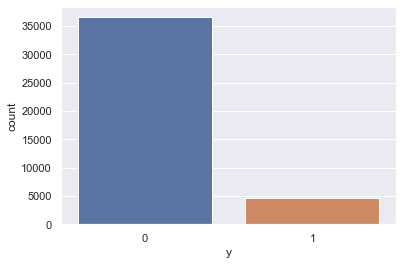

In [44]:
ax = sns.countplot(y,label="Count")     
S, N = y.value_counts()
print('Number of Client subscribed : ',S)
print('Number of Clients not subscribed  : ',N)


**As we can see from the plot that data is highly imbalanced. And we built model based on this dataset then I will be baised**

**To avoid this we will apply oversamplying technique SMOTE**

In [45]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(numeric_dataset, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({0: 36536, 1: 4639})
Counter({0: 36536, 1: 36536})


Number of Client subscribed :  36536
Number of Clients not subscribed  :  36536


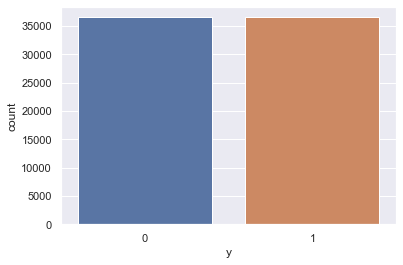

In [46]:
ax = sns.countplot(y,label="Count")     
S, N = y.value_counts()
print('Number of Client subscribed : ',S)
print('Number of Clients not subscribed  : ',N)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>After applying SMOTE, we can see that data is balanced</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id="Standardizing_Data"> </a>
## 3.10 Standardizing Data


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
scaler.fit(x)

StandardScaler()

In [50]:
X = scaler.fit_transform(x)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("y_train ",y_train.shape)

# print the shape of 'y_test'
print("y_test ",y_test.shape)

X_train  (51150, 44)
X_test  (21922, 44)
y_train  (51150,)
y_test  (21922,)


<a id="Supervised_Learning"> </a>
## 4. Supervised Learning


<a id="Logistic_Regression"> </a>
## 4.1 Logistic Regression


<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a model. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a model, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [53]:
from sklearn.linear_model import LogisticRegression


In [54]:
# Create logistic regression
logistic = LogisticRegression()

In [55]:
logistic.fit(X_train,y_train)

LogisticRegression()

**2. Predict the values**

In [56]:
# predict the values
y_pred = logistic.predict(X_test)

**4. Compute accuracy measures**

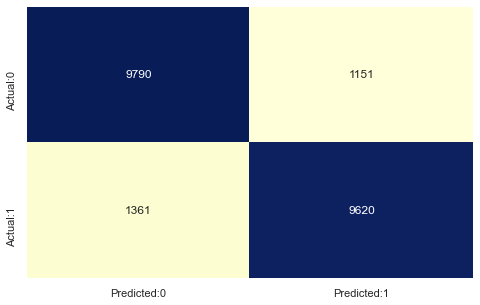

In [57]:
from sklearn.metrics import confusion_matrix
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [58]:
   # True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]                                                           

In [59]:
from sklearn.metrics import classification_report
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     10941
           1       0.89      0.88      0.88     10981

    accuracy                           0.89     21922
   macro avg       0.89      0.89      0.89     21922
weighted avg       0.89      0.89      0.89     21922



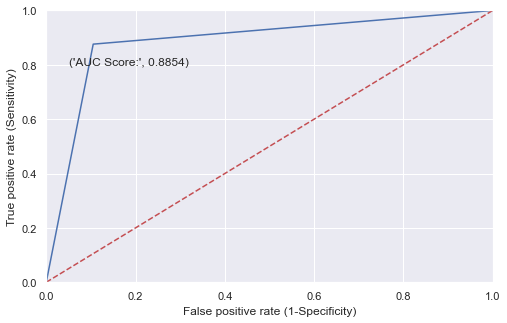

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier is away from the dotted line; which means the meta-estimator model is a good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>



**5. Tabulate the results**

In [61]:
from sklearn import metrics
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Bagging_Meta_estimator = pd.Series({'Model': "Logistic Regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(Bagging_Meta_estimator , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.885429,0.893139,0.876059,0.885412,0.884516


<a id="AdaBoost"> </a>
## 4.2 AdaBoost


<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a ensemble model using AdaBoost. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a  model using AdaBoost, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [62]:
from sklearn.ensemble import AdaBoostClassifier

# build the model
adaboost = AdaBoostClassifier(random_state=10)
# fit the model
adaboost.fit(X_train, y_train)




AdaBoostClassifier(random_state=10)

**2. Do predictions on the test set**

In [63]:
# predict the values
y_pred_adaboost  = adaboost.predict(X_test)

Before we compute the accuracy measures, let us plot the confusion matrix.

**3. Compute accuracy measures**

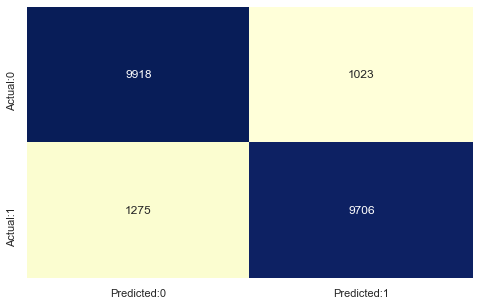

In [64]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_adaboost)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [65]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]                                                           

In [66]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_adaboost)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90     10941
           1       0.90      0.88      0.89     10981

    accuracy                           0.90     21922
   macro avg       0.90      0.90      0.90     21922
weighted avg       0.90      0.90      0.90     21922



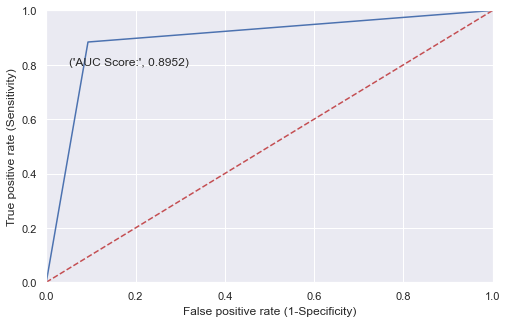

In [67]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_adaboost)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_adaboost),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier (Adaboost) is far away from the dotted line; which means that Adaboost is a very good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Tabulate the results**

In [68]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
adaboost_metrics = pd.Series({'Model': "AdaBoost",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_adaboost),
                 'Precision Score': metrics.precision_score(y_test, y_pred_adaboost),
                 'Recall Score': metrics.recall_score(y_test, y_pred_adaboost),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_adaboost),
                  'f1-score':metrics.f1_score(y_test, y_pred_adaboost)})



# appending our result table
result_tabulation = result_tabulation.append(adaboost_metrics , ignore_index = True)

# view the result table
result_tabulation


#Logistic Regression	0.68056	0.68797	0.383916	0.908524	0.492819

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.885429,0.893139,0.876059,0.885412,0.884516
1,AdaBoost,0.895194,0.904651,0.883890,0.895174,0.894150


<a id="Naive_Bayes"> </a>
## 4.3 Naive Bayes


<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a Ensemble learning model using XGB(extreme Gradient Boosting). We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to build a model using XGBM, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [69]:
from sklearn.naive_bayes import GaussianNB

# build the model
GNB = GaussianNB()

# fit the model
GNB.fit(X_train, y_train)


GaussianNB()

**2. Predict the values for the test set**

In [70]:
# predict the values
y_pred_GNB  = GNB.predict(X_test)

**3. Compute accuracy measures**

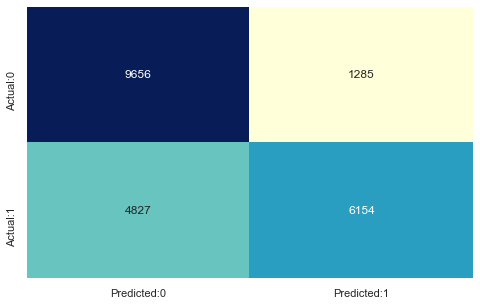

In [71]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_GNB)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [72]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]               

In [73]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_GNB)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.67      0.88      0.76     10941
           1       0.83      0.56      0.67     10981

    accuracy                           0.72     21922
   macro avg       0.75      0.72      0.71     21922
weighted avg       0.75      0.72      0.71     21922



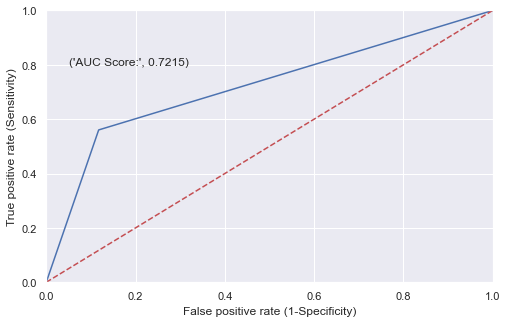

In [74]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_GNB)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_GNB),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier is not very far away from the dotted line; which means the it is not a good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Tabulate the results**

In [75]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
GNB_metrices = pd.Series({'Model': "Naive Bayes",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_GNB),
                 'Precision Score': metrics.precision_score(y_test, y_pred_GNB),
                 'Recall Score': metrics.recall_score(y_test, y_pred_GNB),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_GNB),

                  'f1-score':metrics.f1_score(y_test, y_pred_GNB)})



# appending our result table
result_tabulation = result_tabulation.append(GNB_metrices , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.885429,0.893139,0.876059,0.885412,0.884516
1,AdaBoost,0.895194,0.904651,0.883890,0.895174,0.894150
2,Naive Bayes,0.721487,0.827262,0.560423,0.721193,0.668187


<a id="KNN"> </a>
## 4.4 KNN

<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a ensemble model. We start with our data set gradually proceeding with our analysis<br><br>
                        In order to build a model, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [76]:
from sklearn.neighbors import KNeighborsClassifier

**Hyper Parameter Tuning to find optimal 'k'**

In [77]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 6)}


In [78]:
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

In [79]:
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5])})

In [80]:
knn_gscv.best_estimator_

KNeighborsClassifier(n_neighbors=2)

**2. Do predictions on the test set**

In [81]:
# predict the values
y_pred_knn  = knn_gscv.predict(X_test)

Before we compute the accuracy measures, let us plot the confusion matrix.

**3. Compute accuracy measures**

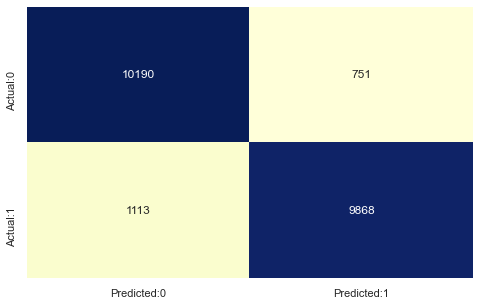

In [82]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [83]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]                                                           

In [84]:
# accuracy measures by classification_report()
result = classification_report(y_test, y_pred_knn)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     10941
           1       0.93      0.90      0.91     10981

    accuracy                           0.91     21922
   macro avg       0.92      0.92      0.91     21922
weighted avg       0.92      0.91      0.91     21922



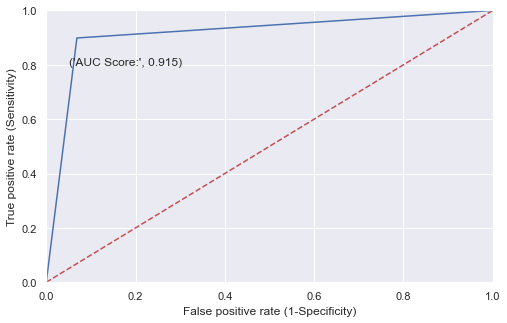

In [85]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_knn),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier (Adaboost) is far away from the dotted line; which means that Adaboost is a very good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Tabulate the results**

In [86]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
knn_metrics = pd.Series({'Model': "KNN",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_knn),
                 'Precision Score': metrics.precision_score(y_test, y_pred_knn),
                 'Recall Score': metrics.recall_score(y_test, y_pred_knn),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_knn),
                  'f1-score':metrics.f1_score(y_test, y_pred_knn)})



# appending our result table
result_tabulation = result_tabulation.append(knn_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.885429,0.893139,0.876059,0.885412,0.884516
1,AdaBoost,0.895194,0.904651,0.883890,0.895174,0.894150
2,Naive Bayes,0.721487,0.827262,0.560423,0.721193,0.668187
3,KNN,0.915001,0.929278,0.898643,0.914971,0.913704



<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier is not very far away from the dotted line; which means the it is not a good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>




<a id="SVM"> </a>
## 4.5 Support Vector Machine


<table align="left">
    <tr>
        <td width="8%">
            <img src="key.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b> Now we build a model. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to build a model, we do the following:<br>
                        1. Build the model<br>
                        2. Predict the values<br>
                        3. Compute the accuracy measures<br>
                        4. Tabulate the results <br>
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Build the model**

In [88]:
from sklearn.svm import SVC
# build the model
svclassifier = SVC(kernel = 'linear')



In [89]:
# fit the model
svclassifier.fit(X_train, y_train)


SVC(kernel='linear')

**2. Predict the values for the test set**

In [90]:
# predict the values
y_pred_SVC  = svclassifier.predict(X_test)

**3. Compute accuracy measures**

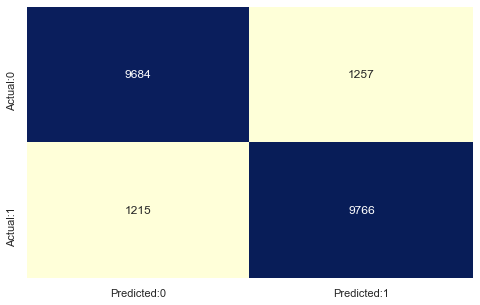

In [91]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_SVC)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

In [92]:
# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Negatives are denoted by 'FN'
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# False Positives are denoted by 'FP'
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]               

In [93]:
# accuracy measures by classification_report()
result = classification_report(y_test,y_pred_SVC)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     10941
           1       0.89      0.89      0.89     10981

    accuracy                           0.89     21922
   macro avg       0.89      0.89      0.89     21922
weighted avg       0.89      0.89      0.89     21922



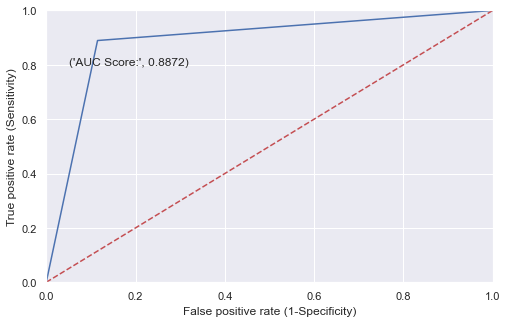

In [94]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_SVC)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_SVC),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)<br><br>
We see our classifier is not very far away from the dotted line; which means the it is not a good classifier  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Tabulate the results**

In [95]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names


# compiling the required information
SVM_metrices = pd.Series({'Model': "Support Vector MAchine",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_SVC),
                 'Precision Score': metrics.precision_score(y_test, y_pred_SVC),
                 'Recall Score': metrics.recall_score(y_test, y_pred_SVC),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_SVC),

                  'f1-score':metrics.f1_score(y_test, y_pred_SVC)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_metrices , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.885429,0.893139,0.876059,0.885412,0.884516
1,AdaBoost,0.895194,0.904651,0.883890,0.895174,0.894150
2,Naive Bayes,0.721487,0.827262,0.560423,0.721193,0.668187
3,KNN,0.915001,0.929278,0.898643,0.914971,0.913704
4,Support Vector MAchine,0.887233,0.885966,0.889354,0.887237,0.887657


<a id="model_cmp"> </a>
## 5. Model Comparision

In [96]:
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.885429,0.893139,0.876059,0.885412,0.884516
1,AdaBoost,0.895194,0.904651,0.883890,0.895174,0.894150
2,Naive Bayes,0.721487,0.827262,0.560423,0.721193,0.668187
3,KNN,0.915001,0.929278,0.898643,0.914971,0.913704
4,Support Vector MAchine,0.887233,0.885966,0.889354,0.887237,0.887657


<table align="left">
    <tr>
        <td width="8%">
            <img src="note.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                    <b>It can be seen from the result tabulation, that performance measures for the KNN is better than other models. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
import numpy as np
a = np.arange(1,9).reshape(2,2)
a

ValueError: cannot reshape array of size 8 into shape (2,2)